**Importing Libraries**

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from keras.models import Sequential as Seq
from keras.layers import Dense
from keras.constraints import unit_norm #to force weights to have a magnitude of 1.0
from keras.optimizers import SGD 
from sklearn.metrics import confusion_matrix
from keras.utils import to_categorical

Using TensorFlow backend.


# Importing and Preprocessing Data

In [3]:
path = '../Codes/'
filename = 'semeionCSV.csv'
df = pd.read_csv(path+filename)
print(df.shape) #checking the shape of the dataset
print(len(df)) # checking if the full rows of the data was imported  

(1592, 266)
1592


In [4]:
pd.set_option('display.max_columns', 266)
#print(df.head()) #printing out few entries of the data from the top row eventhough have accessed it in notpad and excel++
#print(df.tail()) #printing out few entries of the data from the bottom row eventhough have accessed it in notpad++

In [5]:
#Check if there is column tht contains all zeros
df = df.loc[:, (df != 0).any(axis=0)]
#print(df.shape) #checking the shape of the dataset

### Dividing the Dataset into Predictor and Response Variable

In [6]:
Dependent = df[df.columns[256:]].copy()
#print(Dependent)

In [7]:
Independent = df[df.columns[:256]].copy()
#print(Independent)
Independent25 = Independent 

**Standardize** (to regress the data mean to 0 and standard deviation to 1) the features so that the model can converge fast 

In [8]:
standardize = preprocessing.StandardScaler().fit(Independent)
Independent = standardize.transform(Independent)
#print(Independent)

C:\Users\CHERPENS\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\CHERPENS\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  


In [9]:
Independent.shape

(1592, 256)

**Creating Training and Testing Set**

In [10]:
#Split the Data into Training and Testing Set 70/30 respectively 
Indep_train, Indep_test, Dep_train, Dep_test = train_test_split(Independent, Dependent, test_size=0.30, random_state=0)

## Building the Neural Network

In [11]:
# Define and Initialising the CNN Model
NN_Model = Seq()

### Adding 20 Hidden and 10 output layers to the model

In [12]:
#Adding 20 Hidden and 10 output layers to the model
NN_Model.add(Dense(20, input_dim = 256, bias_constraint = unit_norm(axis = 0),
                   activation = 'sigmoid'))
NN_Model.add(Dense(10, bias_constraint = unit_norm(axis = 0), activation = 'sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


**Setting Up SGD Backpropagation with Learning Rate**

In [13]:
BPSGD_opt = SGD(lr=0.1) #Set the learning rate to 0.1

**Model Compilation**

In [14]:
NN_Model.compile(optimizer = BPSGD_opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [15]:
NN_Model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 20)                5140      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
Total params: 5,350
Trainable params: 5,350
Non-trainable params: 0
_________________________________________________________________


**Fitting the NN Model**

In [16]:
NN_Model_Capture = NN_Model.fit(Indep_train, Dep_train, epochs = 50, 
                                validation_data = (Indep_test, Dep_test))

Instructions for updating:
Use tf.cast instead.
Train on 1114 samples, validate on 478 samples
Epoch 1/50
1114/1114 [==============================] - 0s 378us/step - loss: 2.2696 - acc: 0.1194 - val_loss: 2.2076 - val_acc: 0.1736
Epoch 2/50
1114/1114 [==============================] - 0s 75us/step - loss: 2.1488 - acc: 0.2846 - val_loss: 2.1100 - val_acc: 0.3431
Epoch 3/50
1114/1114 [==============================] - 0s 72us/step - loss: 2.0418 - acc: 0.4578 - val_loss: 2.0051 - val_acc: 0.4979
Epoch 4/50
1114/1114 [==============================] - 0s 66us/step - loss: 1.9209 - acc: 0.6257 - val_loss: 1.8810 - val_acc: 0.6464
Epoch 5/50
1114/1114 [==============================] - 0s 71us/step - loss: 1.7783 - acc: 0.7101 - val_loss: 1.7383 - val_acc: 0.7197
Epoch 6/50
1114/1114 [==============================] - 0s 85us/step - loss: 1.6208 - acc: 0.7756 - val_loss: 1.5876 - val_acc: 0.7699
Epoch 7/50
1114/1114 [==============================] - 0s 69us/step - loss: 1.4600 - acc: 0.8

#### Accuracy on Training AND Test Set

In [17]:
loss, accuracy = NN_Model.evaluate(Indep_train, Dep_train, verbose=0)
print('Accuracy for Training Set: %f' % (accuracy))
print('Lossfor Training Set: %f' % (loss))

Accuracy for Training Set: 0.996409
Lossfor Training Set: 0.098664


In [18]:
loss, accuracy = NN_Model.evaluate(Indep_test, Dep_test, verbose=0)
print('Accuracy for Training Set: %f' % (accuracy))
print('Lossfor Training Set: %f' % (loss))

Accuracy for Training Set: 0.903766
Lossfor Training Set: 0.340352


In [19]:
print('Accuracy for Training Set:', np.mean(NN_Model_Capture.history["acc"]))
print('Accuracy for Test Set:', np.mean(NN_Model_Capture.history["val_acc"]))

Accuracy for Training Set: 0.9068761219640714
Accuracy for Test Set: 0.8495397491198203


#### Confusion Matrix

In [106]:
Dependent_Pred = NN_Model.predict(Indep_test)
Predicted_classes = np.argmax(Dependent_Pred, axis = 1)

In [107]:
Confusion_Matrix = confusion_matrix(Dep_test.values.argmax(axis=1), Predicted_classes)
Confusion_Matrix

array([[49,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 46,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  4, 41,  0,  1,  0,  2,  0,  2,  0],
       [ 0,  0,  0, 34,  1,  2,  0,  2,  0,  2],
       [ 0,  3,  0,  0, 47,  0,  1,  0,  0,  1],
       [ 0,  0,  0,  2,  0, 47,  0,  1,  1,  1],
       [ 0,  0,  0,  0,  0,  0, 46,  0,  0,  0],
       [ 0,  3,  1,  0,  0,  0,  0, 36,  0,  1],
       [ 1,  1,  5,  0,  0,  0,  0,  0, 39,  1],
       [ 1,  1,  0,  3,  0,  0,  0,  1,  2, 45]], dtype=int64)

#### Summarized Result on the Test Set

In [108]:
Summarized_Result = classification_report(Dep_test.values.argmax(axis=1), Predicted_classes)
print(Summarized_Result)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        49
           1       0.79      0.98      0.88        47
           2       0.85      0.82      0.84        50
           3       0.87      0.83      0.85        41
           4       0.96      0.90      0.93        52
           5       0.96      0.90      0.93        52
           6       0.94      1.00      0.97        46
           7       0.90      0.88      0.89        41
           8       0.89      0.83      0.86        47
           9       0.88      0.85      0.87        53

   micro avg       0.90      0.90      0.90       478
   macro avg       0.90      0.90      0.90       478
weighted avg       0.90      0.90      0.90       478



#### 1b. Give a plot of both training and test accuracy as a function of epoch number (graph both of these on sample plot).

In [109]:
Capture_acc = NN_Model_Capture.history['acc']
Capture_val_acc = NN_Model_Capture.history['val_acc']
Capture_loss = NN_Model_Capture.history['loss']
Capture_val_loss = NN_Model_Capture.history['val_loss']
epochs = range(1, len(Capture_acc) + 1)

<Figure size 432x288 with 0 Axes>

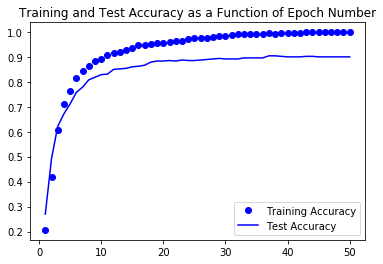

<Figure size 432x288 with 0 Axes>

In [110]:
plt.plot(epochs, Capture_acc, 'bo', label = 'Training Accuracy')
plt.plot(epochs, Capture_val_acc, 'b', label = 'Test Accuracy')
plt.title('Training and Test Accuracy as a Function of Epoch Number')
plt.legend()
plt.figure()

# Question 1

### 1a. Conduct experiments with n = 20, 50 and 100. (Hint: remember to include bias unit weights).

#### =============================================================================================================================

### Adding 50 Hidden and 10 output layers to the model

In [111]:
NN_Model50 = Seq()

In [112]:
#Adding 50 Hidden and 10 output layers to the model
NN_Model50.add(Dense(50, input_dim = 256, bias_constraint = unit_norm(axis = 0),
                   activation = 'sigmoid'))
NN_Model50.add(Dense(10, bias_constraint = unit_norm(axis = 0), activation = 'sigmoid'))

**Model Compilation**

In [113]:
NN_Model50.compile(optimizer = BPSGD_opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [114]:
NN_Model50.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 50)                12850     
_________________________________________________________________
dense_16 (Dense)             (None, 10)                510       
Total params: 13,360
Trainable params: 13,360
Non-trainable params: 0
_________________________________________________________________


**Fitting the NN Model**

In [115]:
NN_Model_Capture = NN_Model50.fit(Indep_train, Dep_train, epochs = 50, 
                                validation_data = (Indep_test, Dep_test))

Train on 1114 samples, validate on 478 samples
Epoch 1/50
1114/1114 [==============================] - 1s 540us/step - loss: 2.2087 - acc: 0.1786 - val_loss: 2.0725 - val_acc: 0.4247
Epoch 2/50
1114/1114 [==============================] - 0s 92us/step - loss: 1.9261 - acc: 0.5916 - val_loss: 1.8010 - val_acc: 0.6883
Epoch 3/50
1114/1114 [==============================] - 0s 78us/step - loss: 1.6073 - acc: 0.7594 - val_loss: 1.4892 - val_acc: 0.7510
Epoch 4/50
1114/1114 [==============================] - 0s 77us/step - loss: 1.2863 - acc: 0.8285 - val_loss: 1.2089 - val_acc: 0.8180
Epoch 5/50
1114/1114 [==============================] - 0s 89us/step - loss: 1.0264 - acc: 0.8582 - val_loss: 0.9996 - val_acc: 0.8285
Epoch 6/50
1114/1114 [==============================] - 0s 88us/step - loss: 0.8340 - acc: 0.8914 - val_loss: 0.8507 - val_acc: 0.8515
Epoch 7/50
1114/1114 [==============================] - 0s 81us/step - loss: 0.6960 - acc: 0.9039 - val_loss: 0.7393 - val_acc: 0.8556
Epoch 8

#### Accuracy on Training AND Test Set

In [116]:
loss, accuracy = NN_Model50.evaluate(Indep_train, Dep_train, verbose=0)
print('Accuracy for Training Set: %f' % (accuracy))
print('Lossfor Training Set: %f' % (loss))

Accuracy for Training Set: 0.998205
Lossfor Training Set: 0.052630


In [117]:
print('Accuracy for Training Set:', np.mean(NN_Model_Capture.history["acc"]))
print('Accuracy for Test Set:', np.mean(NN_Model_Capture.history["val_acc"]))

Accuracy for Training Set: 0.9449371632617937
Accuracy for Test Set: 0.893723848147871


#### Confusion Matrix

In [118]:
Dependent_Pred = NN_Model50.predict(Indep_test)
Predicted_classes = np.argmax(Dependent_Pred, axis = 1)

In [119]:
Confusion_Matrix = confusion_matrix(Dep_test.values.argmax(axis=1), Predicted_classes)
Confusion_Matrix

array([[49,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 45,  0,  0,  0,  0,  0,  1,  0,  1],
       [ 1,  1, 46,  0,  1,  0,  0,  0,  1,  0],
       [ 0,  1,  0, 38,  0,  1,  0,  0,  0,  1],
       [ 0,  2,  0,  0, 48,  0,  1,  0,  0,  1],
       [ 0,  0,  0,  1,  0, 49,  0,  0,  1,  1],
       [ 0,  0,  0,  0,  0,  0, 46,  0,  0,  0],
       [ 0,  1,  0,  1,  1,  0,  1, 36,  1,  0],
       [ 0,  1,  2,  0,  0,  0,  0,  0, 43,  1],
       [ 1,  1,  0,  3,  0,  0,  0,  0,  2, 46]], dtype=int64)

#### Summarized Result on the Test Set

In [120]:
Summarized_Result = classification_report(Dep_test.values.argmax(axis=1), Predicted_classes)
print(Summarized_Result)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        49
           1       0.87      0.96      0.91        47
           2       0.96      0.92      0.94        50
           3       0.88      0.93      0.90        41
           4       0.96      0.92      0.94        52
           5       0.98      0.94      0.96        52
           6       0.96      1.00      0.98        46
           7       0.97      0.88      0.92        41
           8       0.90      0.91      0.91        47
           9       0.90      0.87      0.88        53

   micro avg       0.93      0.93      0.93       478
   macro avg       0.93      0.93      0.93       478
weighted avg       0.93      0.93      0.93       478



#### 1b. Give a plot of both training and test accuracy as a function of epoch number (graph both of these on sample plot).

In [121]:
Capture_acc = NN_Model_Capture.history['acc']
Capture_val_acc = NN_Model_Capture.history['val_acc']
Capture_loss = NN_Model_Capture.history['loss']
Capture_val_loss = NN_Model_Capture.history['val_loss']
epochs = range(1, len(Capture_acc) + 1)

<Figure size 432x288 with 0 Axes>

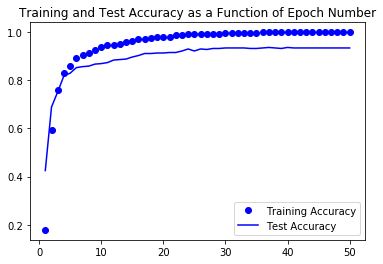

<Figure size 432x288 with 0 Axes>

In [122]:
plt.plot(epochs, Capture_acc, 'bo', label = 'Training Accuracy')
plt.plot(epochs, Capture_val_acc, 'b', label = 'Test Accuracy')
plt.title('Training and Test Accuracy as a Function of Epoch Number')
plt.legend()
plt.figure()

#### =============================================================================================================================

### Adding 100 Hidden and 10 output layers to the model

In [127]:
NN_Model100 = Seq()

In [128]:
#Adding 50 Hidden and 10 output layers to the model
NN_Model100.add(Dense(100, input_dim = 256, bias_constraint = unit_norm(axis = 0),
                   activation = 'sigmoid'))
NN_Model100.add(Dense(10, bias_constraint = unit_norm(axis = 0), activation = 'sigmoid'))

**Model Compilation**

In [129]:
NN_Model100.compile(optimizer = BPSGD_opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [130]:
NN_Model100.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 100)               25700     
_________________________________________________________________
dense_20 (Dense)             (None, 10)                1010      
Total params: 26,710
Trainable params: 26,710
Non-trainable params: 0
_________________________________________________________________


**Fitting the NN Model**

In [131]:
NN_Model_Capture = NN_Model100.fit(Indep_train, Dep_train, epochs = 50, 
                                validation_data = (Indep_test, Dep_test))

Train on 1114 samples, validate on 478 samples
Epoch 1/50
1114/1114 [==============================] - 1s 584us/step - loss: 2.2177 - acc: 0.1697 - val_loss: 2.0613 - val_acc: 0.3619
Epoch 2/50
1114/1114 [==============================] - 0s 93us/step - loss: 1.8348 - acc: 0.6445 - val_loss: 1.5933 - val_acc: 0.7406
Epoch 3/50
1114/1114 [==============================] - 0s 81us/step - loss: 1.3203 - acc: 0.8061 - val_loss: 1.1645 - val_acc: 0.7887
Epoch 4/50
1114/1114 [==============================] - 0s 85us/step - loss: 0.9452 - acc: 0.8546 - val_loss: 0.8941 - val_acc: 0.8368
Epoch 5/50
1114/1114 [==============================] - 0s 85us/step - loss: 0.7167 - acc: 0.8977 - val_loss: 0.7303 - val_acc: 0.8577
Epoch 6/50
1114/1114 [==============================] - 0s 82us/step - loss: 0.5707 - acc: 0.9129 - val_loss: 0.6329 - val_acc: 0.8682
Epoch 7/50
1114/1114 [==============================] - 0s 90us/step - loss: 0.4755 - acc: 0.9273 - val_loss: 0.5588 - val_acc: 0.8703
Epoch 8

#### Accuracy on Training AND Test Set

In [132]:
loss, accuracy = NN_Model100.evaluate(Indep_train, Dep_train, verbose=0)
print('Accuracy for Training Set: %f' % (accuracy))
print('Lossfor Training Set: %f' % (loss))

Accuracy for Training Set: 0.999102
Lossfor Training Set: 0.037541


In [133]:
print('Accuracy for Training Set:', np.mean(NN_Model_Capture.history["acc"]))
print('Accuracy for Test Set:', np.mean(NN_Model_Capture.history["val_acc"]))

Accuracy for Training Set: 0.9538240572836927
Accuracy for Test Set: 0.8955648535564855


#### Confusion Matrix

In [134]:
Dependent_Pred = NN_Model100.predict(Indep_test)
Predicted_classes = np.argmax(Dependent_Pred, axis = 1)

In [135]:
Confusion_Matrix = confusion_matrix(Dep_test.values.argmax(axis=1), Predicted_classes)
Confusion_Matrix

array([[49,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 45,  0,  0,  0,  0,  0,  1,  0,  1],
       [ 0,  3, 44,  1,  0,  0,  0,  0,  1,  1],
       [ 0,  1,  0, 36,  0,  2,  0,  1,  0,  1],
       [ 0,  1,  0,  0, 48,  0,  1,  1,  0,  1],
       [ 0,  0,  0,  2,  0, 49,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0, 46,  0,  0,  0],
       [ 0,  0,  0,  0,  3,  0,  1, 37,  0,  0],
       [ 0,  0,  4,  0,  0,  0,  0,  0, 42,  1],
       [ 1,  2,  0,  2,  0,  1,  0,  1,  2, 44]], dtype=int64)

#### Summarized Result on the Test Set

In [136]:
Summarized_Result = classification_report(Dep_test.values.argmax(axis=1), Predicted_classes)
print(Summarized_Result)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        49
           1       0.87      0.96      0.91        47
           2       0.92      0.88      0.90        50
           3       0.88      0.88      0.88        41
           4       0.94      0.92      0.93        52
           5       0.94      0.94      0.94        52
           6       0.96      1.00      0.98        46
           7       0.90      0.90      0.90        41
           8       0.91      0.89      0.90        47
           9       0.90      0.83      0.86        53

   micro avg       0.92      0.92      0.92       478
   macro avg       0.92      0.92      0.92       478
weighted avg       0.92      0.92      0.92       478



#### 1b. Give a plot of both training and test accuracy as a function of epoch number (graph both of these on sample plot).

In [137]:
Capture_acc = NN_Model_Capture.history['acc']
Capture_val_acc = NN_Model_Capture.history['val_acc']
Capture_loss = NN_Model_Capture.history['loss']
Capture_val_loss = NN_Model_Capture.history['val_loss']
epochs = range(1, len(Capture_acc) + 1)

<Figure size 432x288 with 0 Axes>

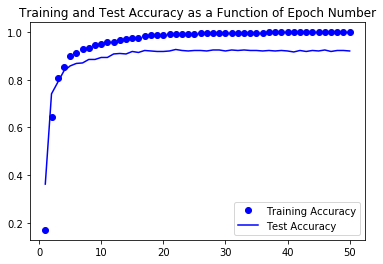

<Figure size 432x288 with 0 Axes>

In [138]:
plt.plot(epochs, Capture_acc, 'bo', label = 'Training Accuracy')
plt.plot(epochs, Capture_val_acc, 'b', label = 'Test Accuracy')
plt.title('Training and Test Accuracy as a Function of Epoch Number')
plt.legend()
plt.figure()

#### 1c. Discuss your results. How does number of hidden units affect the final accuracy on the test data?

**It is obvious that as the number of hidden layers increases, the final accuracy on the test data decreases, this is empirically supported by the fact that hidden unit 20 yielded a test accuracy of  0.8393723848474575 while 50 yielded  0.4970711299783266 and 100  yielded 0.0974058579837428**

#### =============================================================================================================================

#### 1d. Discuss your results. How does number of hidden units affect number of epochs needed for training to converge?

**With convergence meaning the network has learned to properly respond to a set of training patterns within some margin of error and while the margin of error in this instance in machine learning is the  idea of minimizing the loss function and looking at the trend of the three models, I can say as the number hidden units increase the algorithm will need an increased number of epochs to converge.**

#### =============================================================================================================================

#### 1e. Is there any evidence that any of your networks overfit to the training data? If so, what is the evidence?

**There are several criteria to tell that ANN model is overfitted and some of them are when training accuracy is significantly better than the test accuracy. But in all the three models, the difference between the test and training accuracy is less than 0.01, making it difficult to tell if any of the models are overfit.  Also when there is more model parameter information than training data information it is a clear evidence os overfitting and in our case of the models have that problem. Based on the last criteria, will say all the three models are overfitted.**

# Question 2:

In [139]:
#Selecting one quarter and one half of the training
Indep_25 = Independent25.sample(frac=0.325) 
Dep_25 = Dependent.sample(frac=0.325)
Indep_50 = Independent25.sample(frac=0.65) 
Dep_50 = Dependent.sample(frac=0.65)

In [140]:
Indep_25 = standardize.transform(Indep_25)
Indep_50 = standardize.transform(Indep_50)

C:\Users\CHERPENS\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.
C:\Users\CHERPENS\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  


## One Quarter Dataset

In [168]:
Indep_train, Indep_test, Dep_train, Dep_test = train_test_split(Indep_25, Dep_25, test_size=0.232, random_state=0)

In [169]:
NN_Model25 = Seq()

In [170]:
#Adding 50 Hidden and 10 output layers to the model
NN_Model25.add(Dense(100, input_dim = 256, bias_constraint = unit_norm(axis = 0),
                   activation = 'sigmoid'))
NN_Model25.add(Dense(10, bias_constraint = unit_norm(axis = 0), activation = 'sigmoid'))

**Model Compilation**

In [171]:
NN_Model25.compile(optimizer = BPSGD_opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [172]:
NN_Model25.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 100)               25700     
_________________________________________________________________
dense_26 (Dense)             (None, 10)                1010      
Total params: 26,710
Trainable params: 26,710
Non-trainable params: 0
_________________________________________________________________


**Fitting the NN Model**

In [173]:
NN_Model_Capture = NN_Model25.fit(Indep_train, Dep_train, epochs = 50, 
                                validation_data = (Indep_test, Dep_test))

Train on 397 samples, validate on 120 samples
Epoch 1/50
397/397 [==============================] - 1s 2ms/step - loss: 2.3545 - acc: 0.0907 - val_loss: 2.3289 - val_acc: 0.1250
Epoch 2/50
397/397 [==============================] - 0s 124us/step - loss: 2.3027 - acc: 0.0932 - val_loss: 2.3271 - val_acc: 0.1250
Epoch 3/50
397/397 [==============================] - 0s 113us/step - loss: 2.2859 - acc: 0.0932 - val_loss: 2.3229 - val_acc: 0.0833
Epoch 4/50
397/397 [==============================] - 0s 88us/step - loss: 2.2710 - acc: 0.1209 - val_loss: 2.3230 - val_acc: 0.0750
Epoch 5/50
397/397 [==============================] - 0s 103us/step - loss: 2.2572 - acc: 0.1310 - val_loss: 2.3267 - val_acc: 0.0750
Epoch 6/50
397/397 [==============================] - 0s 95us/step - loss: 2.2426 - acc: 0.1713 - val_loss: 2.3368 - val_acc: 0.0750
Epoch 7/50
397/397 [==============================] - 0s 90us/step - loss: 2.2288 - acc: 0.1864 - val_loss: 2.3378 - val_acc: 0.0750
Epoch 8/50
397/397 [=

#### Accuracy on Training AND Test Set

In [174]:
loss, accuracy = NN_Model25.evaluate(Indep_train, Dep_train, verbose=0)
print('Accuracy for Training Set: %f' % (accuracy))
print('Lossfor Training Set: %f' % (loss))

Accuracy for Training Set: 0.846348
Lossfor Training Set: 0.905411


In [175]:
print('Accuracy for Training Set:', np.mean(NN_Model_Capture.history["acc"]))
print('Accuracy for Test Set:', np.mean(NN_Model_Capture.history["val_acc"]))

Accuracy for Training Set: 0.46231738069233125
Accuracy for Test Set: 0.08666666690011819


#### Confusion Matrix

In [176]:
Dependent_Pred = NN_Model25.predict(Indep_test)
Predicted_classes = np.argmax(Dependent_Pred, axis = 1)

In [177]:
Confusion_Matrix = confusion_matrix(Dep_test.values.argmax(axis=1), Predicted_classes)
Confusion_Matrix

array([[3, 0, 1, 2, 4, 1, 2, 1, 0, 0],
       [0, 0, 1, 1, 1, 3, 2, 2, 2, 3],
       [0, 0, 2, 2, 2, 0, 2, 2, 1, 0],
       [1, 0, 2, 0, 2, 3, 1, 0, 0, 2],
       [1, 1, 1, 1, 3, 1, 3, 1, 0, 0],
       [2, 0, 0, 1, 3, 1, 1, 0, 0, 1],
       [2, 0, 3, 0, 1, 2, 0, 2, 0, 2],
       [1, 0, 1, 1, 2, 0, 0, 0, 2, 1],
       [2, 0, 3, 0, 6, 1, 0, 0, 0, 1],
       [3, 1, 2, 2, 2, 1, 1, 2, 0, 1]], dtype=int64)

#### Summarized Result on the Test Set

In [178]:
Summarized_Result = classification_report(Dep_test.values.argmax(axis=1), Predicted_classes)
print(Summarized_Result)

              precision    recall  f1-score   support

           0       0.20      0.21      0.21        14
           1       0.00      0.00      0.00        15
           2       0.12      0.18      0.15        11
           3       0.00      0.00      0.00        11
           4       0.12      0.25      0.16        12
           5       0.08      0.11      0.09         9
           6       0.00      0.00      0.00        12
           7       0.00      0.00      0.00         8
           8       0.00      0.00      0.00        13
           9       0.09      0.07      0.08        15

   micro avg       0.08      0.08      0.08       120
   macro avg       0.06      0.08      0.07       120
weighted avg       0.06      0.08      0.07       120



#### 1b. Give a plot of both training and test accuracy as a function of epoch number (graph both of these on sample plot).

In [179]:
Capture_acc = NN_Model_Capture.history['acc']
Capture_val_acc = NN_Model_Capture.history['val_acc']
Capture_loss = NN_Model_Capture.history['loss']
Capture_val_loss = NN_Model_Capture.history['val_loss']
epochs = range(1, len(Capture_acc) + 1)

<Figure size 432x288 with 0 Axes>

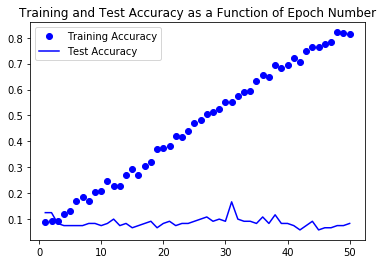

<Figure size 432x288 with 0 Axes>

In [180]:
plt.plot(epochs, Capture_acc, 'bo', label = 'Training Accuracy')
plt.plot(epochs, Capture_val_acc, 'b', label = 'Test Accuracy')
plt.title('Training and Test Accuracy as a Function of Epoch Number')
plt.legend()
plt.figure()

## One Half Dataset

In [181]:
Indep_train, Indep_test, Dep_train, Dep_test = train_test_split(Indep_50, Dep_50, test_size=0.23, random_state=0)

In [182]:
NN_Model55 = Seq()

In [183]:
#Adding 50 Hidden and 10 output layers to the model
NN_Model55.add(Dense(100, input_dim = 256, bias_constraint = unit_norm(axis = 0),
                   activation = 'sigmoid'))
NN_Model55.add(Dense(10, bias_constraint = unit_norm(axis = 0), activation = 'sigmoid'))

In [184]:
BPSGD_opt = SGD(lr=0.1) #Set the learning rate to 0.1

**Model Compilation**

In [185]:
NN_Model55.compile(optimizer = BPSGD_opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [186]:
NN_Model55.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 100)               25700     
_________________________________________________________________
dense_28 (Dense)             (None, 10)                1010      
Total params: 26,710
Trainable params: 26,710
Non-trainable params: 0
_________________________________________________________________


**Fitting the NN Model**

In [187]:
NN_Model_Capture = NN_Model55.fit(Indep_train, Dep_train, epochs = 50, 
                                validation_data = (Indep_test, Dep_test))

Train on 796 samples, validate on 239 samples
Epoch 1/50
796/796 [==============================] - 1s 900us/step - loss: 2.3211 - acc: 0.1018 - val_loss: 2.3227 - val_acc: 0.0753
Epoch 2/50
796/796 [==============================] - 0s 91us/step - loss: 2.2944 - acc: 0.1043 - val_loss: 2.3248 - val_acc: 0.0879
Epoch 3/50
796/796 [==============================] - 0s 99us/step - loss: 2.2820 - acc: 0.1181 - val_loss: 2.3308 - val_acc: 0.0921
Epoch 4/50
796/796 [==============================] - 0s 90us/step - loss: 2.2712 - acc: 0.1407 - val_loss: 2.3281 - val_acc: 0.0795
Epoch 5/50
796/796 [==============================] - 0s 84us/step - loss: 2.2579 - acc: 0.1332 - val_loss: 2.3371 - val_acc: 0.0711
Epoch 6/50
796/796 [==============================] - 0s 107us/step - loss: 2.2455 - acc: 0.1595 - val_loss: 2.3366 - val_acc: 0.0753
Epoch 7/50
796/796 [==============================] - 0s 86us/step - loss: 2.2303 - acc: 0.1759 - val_loss: 2.3368 - val_acc: 0.0921
Epoch 8/50
796/796 [=

#### Accuracy on Training AND Test Set

In [188]:
loss, accuracy = NN_Model55.evaluate(Indep_train, Dep_train, verbose=0)
print('Accuracy for Training Set: %f' % (accuracy))
print('Lossfor Training Set: %f' % (loss))

Accuracy for Training Set: 0.812814
Lossfor Training Set: 0.938685


In [189]:
print('Accuracy for Training Set:', np.mean(NN_Model_Capture.history["acc"]))
print('Accuracy for Test Set:', np.mean(NN_Model_Capture.history["val_acc"]))

Accuracy for Training Set: 0.4249999999685503
Accuracy for Test Set: 0.07907949796468644


#### Confusion Matrix

In [190]:
Dependent_Pred = NN_Model55.predict(Indep_test)
Predicted_classes = np.argmax(Dependent_Pred, axis = 1)

In [191]:
Confusion_Matrix = confusion_matrix(Dep_test.values.argmax(axis=1), Predicted_classes)
Confusion_Matrix

array([[2, 1, 3, 3, 1, 3, 0, 1, 2, 2],
       [3, 2, 1, 1, 3, 4, 3, 4, 3, 5],
       [1, 3, 1, 2, 5, 4, 1, 3, 1, 0],
       [1, 1, 1, 2, 7, 7, 1, 2, 0, 2],
       [5, 3, 1, 2, 0, 2, 1, 0, 3, 1],
       [3, 4, 2, 0, 5, 2, 0, 3, 1, 1],
       [4, 5, 1, 1, 5, 3, 0, 1, 1, 1],
       [3, 2, 4, 0, 2, 4, 2, 2, 3, 7],
       [5, 2, 2, 5, 5, 5, 1, 3, 1, 0],
       [3, 0, 5, 1, 3, 4, 3, 6, 2, 1]], dtype=int64)

#### Summarized Result on the Test Set

In [192]:
Summarized_Result = classification_report(Dep_test.values.argmax(axis=1), Predicted_classes)
print(Summarized_Result)

              precision    recall  f1-score   support

           0       0.07      0.11      0.08        18
           1       0.09      0.07      0.08        29
           2       0.05      0.05      0.05        21
           3       0.12      0.08      0.10        24
           4       0.00      0.00      0.00        18
           5       0.05      0.10      0.07        21
           6       0.00      0.00      0.00        22
           7       0.08      0.07      0.07        29
           8       0.06      0.03      0.04        29
           9       0.05      0.04      0.04        28

   micro avg       0.05      0.05      0.05       239
   macro avg       0.06      0.05      0.05       239
weighted avg       0.06      0.05      0.05       239



#### 1b. Give a plot of both training and test accuracy as a function of epoch number (graph both of these on sample plot).

In [193]:
Capture_acc = NN_Model_Capture.history['acc']
Capture_val_acc = NN_Model_Capture.history['val_acc']
Capture_loss = NN_Model_Capture.history['loss']
Capture_val_loss = NN_Model_Capture.history['val_loss']
epochs = range(1, len(Capture_acc) + 1)

<Figure size 432x288 with 0 Axes>

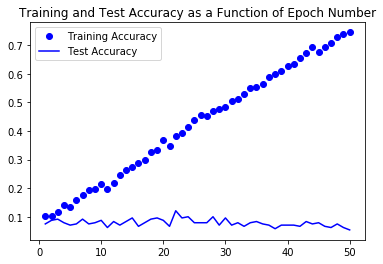

<Figure size 432x288 with 0 Axes>

In [194]:
plt.plot(epochs, Capture_acc, 'bo', label = 'Training Accuracy')
plt.plot(epochs, Capture_val_acc, 'b', label = 'Test Accuracy')
plt.title('Training and Test Accuracy as a Function of Epoch Number')
plt.legend()
plt.figure()